## 线性神经网络
线性神经网络最典型的例子就是自适应线性元件(Adaptive Linear Element,Adaline).   
线性神经网络与感知机的主要区别在于，感知机的传输函数只能输出两种可能的值，而线性神经网络的输出可以取任何值，其传输函数是线性函数。  
线性神经网络采用Widrow-Hoff学习规则，即LMS算法来调整网络的权值和偏置。  
线性神经网络在收敛点精度和速度上较感知机都有了较大提高，但其线性运算规则决定了它只能解决线性可分的问题。  
### 1.线性神经网络的结构
线性神经网络结构与感知机十分相似，只是神经元传输函数不同。 
线性神经网络出了除了产生二值输出以外，还可以产生模拟输出--即采用线性输出函数，使输出可以为任意值。  

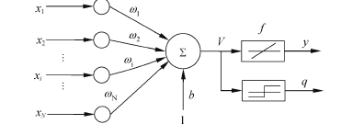

In [1]:
from IPython.display import Image
Image("/Users/shangshuhan/practice/8.png")

假设输出是一个N维向量$x=(x_1,\cdots,x_N)$,从输入到神经元的权值为$w_i,i=1,\cdots,N$,则该神经元的输出为：
$$v=\sum_{i=1}^Nw_ix_i+b$$  
在输出节点的传递函数使用线性函数purelin,表示输出等于输出的函数。线性网络最终的输出为：  
$$ y=\mathrm{purelin}(v)=\mathrm{purelin}(\sum_{i=1}^Nw_ix_i+b)$$  
写成矩阵形式，则输出可以表示为：  
$$y=x^Tw$$  
$$q=sgn(y)$$. 

#### Madaline
若网络中包含多个神经元节点，就能形成多个输出，这种线性神经网络叫做Madaline(Many adaline),结构如下：

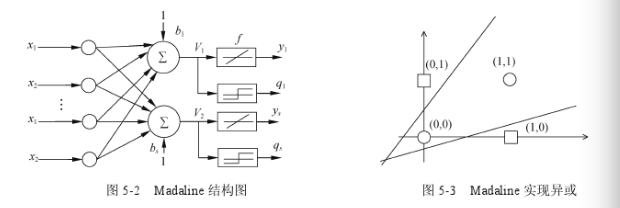

In [2]:
from IPython.display import Image
Image("/Users/shangshuhan/practice/9.png")

Madaline可以用一种间接的方式解决线性不可分的问题，方法是用多个线性函数对区域进行划分，然后对各个神经元的输出做逻辑运算。如上图，Madaline用两条直线实现了异或逻辑。

### 2.线性神经网络的学习规则-W-H规则 
将权重和偏置项初始化为0，然后，利用下面的$\delta$规则(LMS)迭代的修改$w_i$和b，直到训练完成。 

- 对单个训练样例$(x_k,y_k)$,$x_k=(x_k^{(1)},\cdots,x_k^{(n)})^T$共有n个特征。  
若当前感知机的输出为$\hat{y}_k$,
误差函数为：  
$$E_k=\dfrac{1}{2}(y_k-\hat{y}_k)^2$$
则感知机的权重将这样调整：
 $$w_i\leftarrow w_i+\Delta w_i$$  
$$b\leftarrow b+\Delta b $$ 
其中：
$$\Delta w_i=\eta (y_k-\hat{y}_k)x_k^{(i)}$$  
$$\Delta b=\eta(y_k-\hat{y}_k)$$  
这里 $w_i$是与输入$x_k^{(i)}$对应的权重项，b是偏置项，$\eta$为学习率，其作用是控制每一步调整权的幅度。
- 对整个训练数据集$D={\{(x_k,y_k)}\}_{k=1}^m$,它的均方误差为：  
$$E=\dfrac{1}{2m}\sum_{k=1}^m(y_k-\hat{y}_k)^2$$  
这里m可以省略。  
则感知机的权重将这样调整：
 $$w_i\leftarrow w_i+\Delta w_i$$  
$$b\leftarrow b+\Delta b $$ 
其中：
$$\Delta w_i=\eta \sum_{k=1}^m(y_k-\hat{y}_k)x_k^{(i)}$$  
$$\Delta b=\eta\sum_{k=1}^m(y_k-\hat{y}_k)$$  

### 3.线性神经元的代码

In [77]:
import numpy as np
import matplotlib.pyplot as plt
## 自适应线性神经网络
class AdalineGd(object):
    '''
    eta:学习率，0-1之间
    n_iter: 对训练数据进行学习，改进次数
    weights：存储权值
    error:存储每次迭代改进时，神经网络对数据错误判断的次数
    '''
    def __init__(self,eta,n_iter):
        self.eta=eta
        self.n_iter=n_iter
    def fit(self,X,y):
        '''
        :param X:二维数组[n_samples,n_features]
        n_samples表示样本个数 
        n_features表示特征数
        :param y:一维向量
        用于存储每一个训练样本对应的正确分类
        '''
        self.weights=np.zeros(1+X.shape[1])#权重初始化为0
        self.cost=[]
        
        for i in range(self.n_iter):
            output=self.net_input(X)
            errors=(y-output)
            self.weights[1:]+=self.eta*np.dot(X.T,errors)
            self.weights[0]+=self.eta*errors.sum()
            cost=(errors**2).sum()/2
            self.cost.append(cost)
        return self
    def net_input(self,X):
        return np.dot(X,self.weights[1:])+self.weights[0]
    #线性函数f(x)=x
    def activation(self,X):
        return self.net_input(X)
    def predict(self,X):#最后的quantizer数字转换器
        return np.where(self.activation(X)>=0,1,-1)

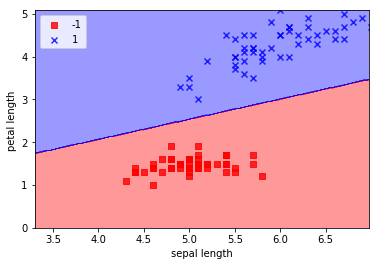

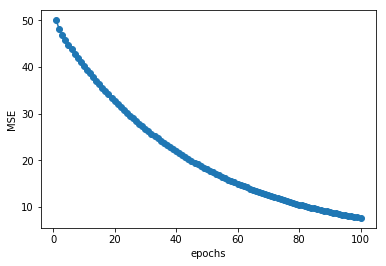

In [96]:
## 测试代码，可视化展示
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()
df=pd.DataFrame(iris.data[0:100,])
y=iris.target[0:100,]
y=np.where(y==0,-1,1)
X=df.loc[:,[0,2]].values
from matplotlib.colors import ListedColormap
def plot_decision_region(X,y,classifier,resolution=0.02):
    markers=('s','x','o','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    x1_min,x1_max=X[:,0].min()-1,X[:,0].max()
    x2_min,x2_max=X[:,1].min()-1,X[:,1].max()
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),
                       np.arange(x2_min,x2_max,resolution))
    #预测得到分类输出
    Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    #print(xx1.ravel())
    #print(xx2.ravel())
    #print(Z)
    Z=Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.8,c=cmap(idx),
                   marker=markers[idx],label=cl)

##开始训练
ada=AdalineGd(eta=0.0001,n_iter=100)
ada.fit(X,y)
# 这里使用predict()并且做一些可视化操作
plot_decision_region(X,y,classifier=ada)
plt.xlabel('sepal length')
plt.ylabel('petal length ')
plt.legend(loc='upper left')
plt.show()

## 可视化w调整的过程中，错误率随迭代次数的变化
plt.plot(range(1,len(ada.cost)+1),ada.cost,marker='o')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.show()

In [95]:
iris.keys()
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### 4. 线性神经网络与感知机的对比
自适应性元件(Adaline Linear Element)由Widrow和Hoff首先提出，主要用途是线性逼近一个函数而进行模式联想。  
它与感知机的主要不同之处：  
- 在于其神经元的激活函数，线性神经网络是一个线性purelin函数，这允许输出可以是任意值，而感知机那样只能取0或1的sign函数.
- 它采用的是W-H学习法则，也称最小均方差规则对权值进行训练。

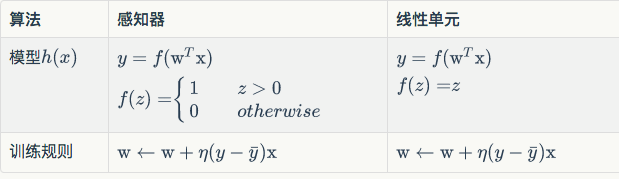

In [98]:
from IPython.display import Image
Image("/Users/shangshuhan/practice/10.png")

由上图的比较，我们可以看出除了激活函数不同外，两者的模型和训练规则是一样的。